# 法律 RAG Notebook 工作流
此 Notebook 示範如何以模組化方式載入 `rag_system` Workflow，替代舊有 CLI。
1. 載入環境變數並建立 `RAGConfig`。
2. 透過 `rag_system.workflow` 建立 LLM 與 LangGraph Workflow。
3. 以程式方式執行查詢並顯示答案。

In [1]:
import sys
import os

# Ensure project root is in python path
current_dir = os.getcwd()
if current_dir.endswith("notebooks"):
    sys.path.append(os.path.abspath(".."))
elif "rag_system" not in os.listdir(current_dir):
    # Fallback try
    sys.path.append(os.path.abspath("."))

from dotenv import load_dotenv
from rag_system.config import RAGConfig
from rag_system.workflow import create_llm, create_rag_workflow, run_query

load_dotenv()
config = RAGConfig.from_env()
config.validate()

/home/jovyan/work/rag_system/common.py:76: UserWarning: SSL verification is disabled. This is insecure and should only be used for development.
  warnings.warn(


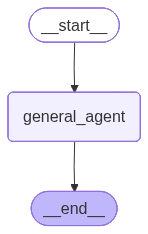

In [2]:
llm = create_llm(config)
workflow = create_rag_workflow(config, llm=llm, use_hierarchical=True)  # 開啟階層式
workflow

In [3]:
from rag_system.common import set_quiet_mode

set_quiet_mode(False)  # 開啟日誌
# set_quiet_mode(True)  # 再次關閉

In [4]:
result_state = run_query(  "陸海空軍懲罰法第7條",
  config,
  llm=llm,
  use_hierarchical=True
)
print(result_state["generation"])

2025-12-03 00:56:01,086 - INFO - rag_system.common - Using hierarchical retrieval system
/home/jovyan/work/rag_system/common.py:76: UserWarning: SSL verification is disabled. This is insecure and should only be used for development.
  warnings.warn(
2025-12-03 00:56:01,098 - INFO - rag_system.common - Running workflow for question: 陸海空軍懲罰法第7條
2025-12-03 00:56:01,099 - INFO - rag_system.common - --- GENERAL AGENT NODE ---
2025-12-03 00:56:01,643 - INFO - httpx - HTTP Request: POST http://172.16.120.67:7000/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-03 00:56:01,648 - INFO - rag_system.common - Routing legal query: '陸海空軍懲罰法第7條'
2025-12-03 00:56:01,657 - INFO - rag_system.common - Found collections with stats: [{'name': '陸海空軍懲罰法', 'doc_count': 86}, {'name': '軍人權益事件處理法', 'doc_count': 85}, {'name': '軍人權益事件處理法-checkpoint', 'doc_count': 85}, {'name': 'test_manual', 'doc_count': 2}]
2025-12-03 00:56:02,009 - INFO - httpx - HTTP Request: POST http://172.16.120.67:7000/v1/chat/completions "HTT

**問題答案**  
目前無法取得《陸海空軍懲罰法》第7條的具體內容，因為在嘗試檢索時發生了伺服器錯誤，導致無法取得該條文的文字。  

**具體條文**  
- 無法取得任何具體條文內容。  

**結論**  
由於檢索失敗，無法提供《陸海空軍懲罰法》第7條的具體條文。若需查閱該條文，建議直接參考官方公布的法規文本或使用其他可靠的法律資料庫。  

**參考資料**  
- 來源: 《陸海空軍懲罰法》 (無法取得具體條文)


In [5]:
question = "懲罰法適用對象"
result_state = run_query(question, config, llm=llm)
print(result_state.get("generation", "尚未產生答案"))

2025-12-03 00:57:06,804 - INFO - rag_system.common - Using hierarchical retrieval system
/home/jovyan/work/rag_system/common.py:76: UserWarning: SSL verification is disabled. This is insecure and should only be used for development.
  warnings.warn(
2025-12-03 00:57:06,817 - INFO - rag_system.common - Running workflow for question: 懲罰法適用對象
2025-12-03 00:57:06,817 - INFO - rag_system.common - --- GENERAL AGENT NODE ---
2025-12-03 00:57:07,275 - INFO - httpx - HTTP Request: POST http://172.16.120.67:7000/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-03 00:57:07,277 - INFO - rag_system.common - Routing legal query: '懲罰法適用對象'
2025-12-03 00:57:07,285 - INFO - rag_system.common - Found collections with stats: [{'name': '陸海空軍懲罰法', 'doc_count': 86}, {'name': '軍人權益事件處理法', 'doc_count': 85}, {'name': '軍人權益事件處理法-checkpoint', 'doc_count': 85}, {'name': 'test_manual', 'doc_count': 2}]
2025-12-03 00:57:07,785 - INFO - httpx - HTTP Request: POST http://172.16.120.67:7000/v1/chat/completions "HTTP/1.1 

檢索時發生錯誤: Server disconnected without sending a response.


In [6]:
question = "修法後的懲罰種類有哪些"
result_state = run_query(question, config, llm=llm)
print(result_state.get("generation", "尚未產生答案"))

2025-12-03 00:57:49,989 - INFO - rag_system.common - Using hierarchical retrieval system
/home/jovyan/work/rag_system/common.py:76: UserWarning: SSL verification is disabled. This is insecure and should only be used for development.
  warnings.warn(
2025-12-03 00:57:50,004 - INFO - rag_system.common - Running workflow for question: 修法後的懲罰種類有哪些
2025-12-03 00:57:50,004 - INFO - rag_system.common - --- GENERAL AGENT NODE ---
2025-12-03 00:57:50,006 - INFO - openai._base_client - Retrying request to /chat/completions in 0.395577 seconds
2025-12-03 00:57:50,403 - INFO - openai._base_client - Retrying request to /chat/completions in 0.829878 seconds
2025-12-03 00:57:51,234 - INFO - rag_system.common - ERROR in agent_node: 處理問題時發生錯誤: Connection error.
2025-12-03 00:57:51,243 - INFO - rag_system.common - Traceback: Traceback (most recent call last):
  File "/opt/conda/lib/python3.13/site-packages/httpx/_transports/default.py", line 101, in map_httpcore_exceptions
    yield
  File "/opt/conda/l

抱歉，處理問題時發生錯誤: Connection error.


In [7]:
question = "懲罰權可以行使的期限為何？"
result_state = run_query(question, config, llm=llm)
print(result_state.get("generation", "尚未產生答案"))

2025-12-03 00:57:51,247 - INFO - rag_system.common - Using hierarchical retrieval system
/home/jovyan/work/rag_system/common.py:76: UserWarning: SSL verification is disabled. This is insecure and should only be used for development.
  warnings.warn(
2025-12-03 00:57:51,260 - INFO - rag_system.common - Running workflow for question: 懲罰權可以行使的期限為何？
2025-12-03 00:57:51,261 - INFO - rag_system.common - --- GENERAL AGENT NODE ---
2025-12-03 00:57:51,263 - INFO - openai._base_client - Retrying request to /chat/completions in 0.472865 seconds
2025-12-03 00:57:51,736 - INFO - openai._base_client - Retrying request to /chat/completions in 0.769702 seconds
2025-12-03 00:57:52,508 - INFO - rag_system.common - ERROR in agent_node: 處理問題時發生錯誤: Connection error.
2025-12-03 00:57:52,510 - INFO - rag_system.common - Traceback: Traceback (most recent call last):
  File "/opt/conda/lib/python3.13/site-packages/httpx/_transports/default.py", line 101, in map_httpcore_exceptions
    yield
  File "/opt/conda

抱歉，處理問題時發生錯誤: Connection error.
